In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import os
import distutils
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, Conv2DTranspose, UpSampling2D, Add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
 train=tfds.load('clic', split='train', shuffle_files=True)

Shuffling and writing examples to /root/tensorflow_datasets/clic/1.0.0.incompleteLOGYBW/clic-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/clic/1.0.0.incompleteLOGYBW/clic-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/clic/1.0.0.incompleteLOGYBW/clic-test.tfrecord


Dataset clic downloaded and prepared to /root/tensorflow_datasets/clic/1.0.0. Subsequent calls will reuse this data.


In [5]:
test=tfds.load('clic', split='test', shuffle_files=True)

In [6]:
validate=tfds.load('clic', split='validation', shuffle_files=True)

In [ ]:
print(train)
print(test)
print(validate)

<_OptionsDataset shapes: {image: (None, None, 3)}, types: {image: tf.uint8}>
<_OptionsDataset shapes: {image: (None, None, 3)}, types: {image: tf.uint8}>
<_OptionsDataset shapes: {image: (None, None, 3)}, types: {image: tf.uint8}>


#Resize data to 128x128x3

In [ ]:
train_temp = train.take(10000)

In [ ]:
train_data = []
train_data_sr = []
for example in train_temp:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  temp = np.array(example["image"])
  PIL_image = Image.fromarray(np.uint8(temp)).convert('RGB')
  im_trans = PIL_image.resize((128, 128))
  train_data.append(np.array(im_trans))
  #im_trans = PIL_image.resize((512, 512))
  #train_data_sr.append(np.array(im_trans))


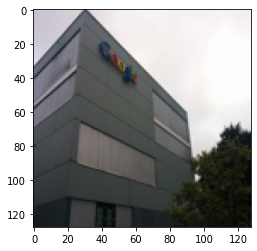

In [ ]:
plt.imshow(train_data[0])

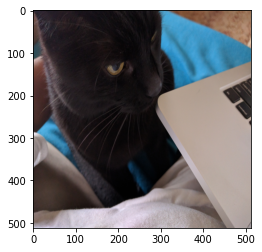

In [ ]:
#plt.imshow(train_data_sr[0])

In [7]:
test_temp = test.take(1000)

In [8]:
test_data = []
test_data_sr = []
for example in test_temp:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  temp = np.array(example["image"])
  PIL_image = Image.fromarray(np.uint8(temp)).convert('RGB')
  im_trans = PIL_image.resize((128, 128))
  test_data.append(np.array(im_trans)) 
  #im_trans = PIL_image.resize((512, 512))
  #test_data_sr.append(np.array(im_trans))

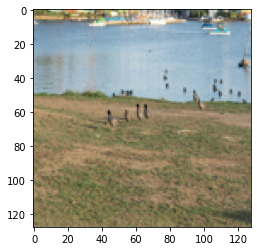

In [9]:
plt.imshow(test_data[0])

In [ ]:
plt.imshow(test_data_sr[0])

In [ ]:
validate_temp = validate.take(1000)

In [ ]:
validation_data = []
validation_data_sr = []
for example in validate_temp:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  temp = np.array(example["image"])
  PIL_image = Image.fromarray(np.uint8(temp)).convert('RGB')
  im_trans = PIL_image.resize((128, 128))
  validation_data.append(np.array(im_trans))
  #im_trans = PIL_image.resize((512, 512))
  #validation_data_sr.append(np.array(im_trans))

In [10]:
#train_data_arr = np.zeros((1633, 128, 128, 3), dtype=np.float32)
test_data_arr = np.zeros((428, 128, 128, 3), dtype=np.float32)
#validation_data_arr = np.zeros((102, 128, 128, 3), dtype=np.float32)

#train_data_sr_arr = np.zeros((1633, 512, 512, 3), dtype=np.float32)
#test_data_sr_arr = np.zeros((428, 512, 512, 3), dtype=np.float32)
#validation_data_sr_arr = np.zeros((102, 512, 512, 3), dtype=np.float32)

In [ ]:
#train_data_sr_arr = np.zeros((1633, 512, 512, 3), dtype=np.float32)
#train_data_arr = np.zeros((1633, 128, 128, 3), dtype=np.float32)

In [ ]:
for i in range(1633):
    train_data_arr[i] = train_data[i]/255.0
    #train_data_sr_arr[i] = train_data_sr[i]/255.0
    if i%100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


In [11]:
for i in range(428):
    test_data_arr[i] = test_data[i]/255.0
    #test_data_sr_arr[i] = test_data_sr[i]/255.0
    if i%100 == 0:
        print(i)

0
100
200
300
400


In [ ]:
for i in range(102):
    validation_data_arr[i] = validation_data[i]/255.0
    #validation_data_sr_arr[i] = validation_data_sr[i]/255.0
    if i%100 == 0:
        print(i)

0
100


In [ ]:
validation_data_sr_arr=0
train_data_sr_arr = 0

In [ ]:
validation_data =[]
test_data = []
train_data=[]
validation_data_sr =[]
test_data_sr = []
train_data_sr=[]

# comp-coder model

In [ ]:
def create_model():
  input_img = Input(shape=(128, 128, 3))

  a1 = tf.keras.layers.Conv2D(32, (3,3), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(input_img)
  a2 = tf.keras.layers.BatchNormalization()(a1)
  a3 = tf.keras.layers.Activation('sigmoid') (a2)

  a4 = tf.keras.layers.Conv2D(64, (5,5), strides=2, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a3)
  a5 = tf.keras.layers.BatchNormalization()(a4)
  a6 = tf.keras.layers.Activation('sigmoid')(a5)

  a7 = tf.keras.layers.Conv2D(128, (5,5), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10)) (a6)
  a8 = tf.keras.layers.BatchNormalization() (a7)
  a9 = tf.keras.layers.Activation('sigmoid')(a8)
  '''
  a10 = tf.keras.layers.Conv2D(128, (5,5), strides=2, padding='same', kernel_regularizer = regularizers.l1(10e-10)) (a9)
  a11 = tf.keras.layers.BatchNormalization()(a10)
  a12 = tf.keras.layers.Activation('sigmoid')(a11)

  a13 = tf.keras.layers.Conv2D(256, (5,5), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a12)
  a14 = tf.keras.layers.BatchNormalization() (a13)
  a15 = tf.keras.layers.Activation('sigmoid')(a14)
  '''
  a16 = tf.keras.layers.Conv2D(256, (5,5), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a9)
  a17 = tf.keras.layers.BatchNormalization()(a16)
  a18 = tf.keras.layers.Activation('sigmoid')(a17)

  a19 = tf.keras.layers.Conv2D(128, (7,7), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a18)
  a20 = tf.keras.layers.BatchNormalization()(a19)
  a21 = tf.keras.layers.Activation('sigmoid')(a20)

  skip_0 = tf.keras.layers.Add()([a21, a9])

  a22 = tf.keras.layers.Conv2D(64, (7,7), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(skip_0)
  a23 = tf.keras.layers.BatchNormalization()(a22)
  a24 = tf.keras.layers.Activation('sigmoid')(a23)

  a25 = tf.keras.layers.Conv2D(16, (7,7), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a24)
  a26 = tf.keras.layers.BatchNormalization()(a25)
  a27 = tf.keras.layers.Activation('sigmoid')(a26)

#compressed version
  a28 = tf.keras.layers.Conv2D(3, (7,7),strides=1, padding='same')(a27)
  a29 = tf.keras.layers.BatchNormalization()(a28)
  a30 = tf.keras.layers.Activation('sigmoid')(a29)
################

  #Decoder
  a31 = tf.keras.layers.Conv2DTranspose(32, (3,3), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a30)
  a32 = tf.keras.layers.BatchNormalization()(a31)
  a33 = tf.keras.layers.Activation('sigmoid')(a32)

  a34 = tf.keras.layers.Conv2DTranspose(256, (3,3), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a33)
  a35 = tf.keras.layers.BatchNormalization()(a34)
  a36 = tf.keras.layers.Activation('sigmoid')(a35)  

  #a37 = tf.keras.layers.Add()([a36, a18])
  '''
  a38 = tf.keras.layers.Conv2DTranspose(256, (5,5), strides=2, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a36)
  a39 = tf.keras.layers.BatchNormalization()(a38)
  a40 = tf.keras.layers.Activation('sigmoid')(a39)

  a41 = tf.keras.layers.Conv2DTranspose(128, (5,5), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a40)
  a42 = tf.keras.layers.BatchNormalization()(a41)
  a43 = tf.keras.layers.Activation('sigmoid')(a42)
  '''
  #a44 = tf.keras.layers.Add()([a43, a12])

  a45 = tf.keras.layers.Conv2DTranspose(128, (5,5), strides=2, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a36)
  a46 = tf.keras.layers.BatchNormalization()(a45)
  a47 = tf.keras.layers.Activation('sigmoid')(a46)

  a48 = tf.keras.layers.Conv2DTranspose(64, (5,5), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a47)
  a49 = tf.keras.layers.BatchNormalization()(a48)
  a50 = tf.keras.layers.Activation('sigmoid')(a49)

  #a51 = tf.keras.layers.Add()([a50, a6])

  a52 = tf.keras.layers.Conv2DTranspose(64, (5,5), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a50)
  a53 = tf.keras.layers.BatchNormalization()(a52)
  a54 = tf.keras.layers.Activation('sigmoid')(a53)

  a55 = tf.keras.layers.Conv2DTranspose(64, (5,5), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a54)
  a56 = tf.keras.layers.BatchNormalization()(a55)
  a57 = tf.keras.layers.Activation('sigmoid')(a56)

  skip_1 = tf.keras.layers.Add()([a50, a57])

  a58 = tf.keras.layers.Conv2DTranspose(3, (7,7), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a57)
  a59 = tf.keras.layers.BatchNormalization()(a58)
  a60 = tf.keras.layers.Activation('sigmoid')(a59)

  model = Model(input_img, a60)
  
  return model

In [ ]:
model = create_model()
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ), loss='mae')

In [ ]:
history_comp = model.fit(x=train_data_arr, y=train_data_arr, epochs=150, validation_split=0.2, batch_size=32, validation_data=(validation_data_arr, validation_data_arr))

Epoch 1/150
 2/41 [>.............................] - ETA: 11s - loss: 0.3140WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.1815s vs `on_train_batch_end` time: 0.4234s). Check your callbacks.


41/41 [==============================] - 31s 749ms/step - loss: 0.2099 - val_loss: 0.2264
Epoch 2/150
41/41 [==============================] - 27s 659ms/step - loss: 0.1226 - val_loss: 0.2438
Epoch 3/150
41/41 [==============================] - 27s 668ms/step - loss: 0.1104 - val_loss: 0.2710
Epoch 4/150
41/41 [==============================] - 28s 676ms/step - loss: 0.1012 - val_loss: 0.2365
Epoch 5/150
41/41 [==============================] - 29s 697ms/step - loss: 0.0877 - val_loss: 0.2425
Epoch 6/150
41/41 [==============================] - 29s 706ms/step - loss: 0.0837 - val_loss: 0.2375
Epoch 7/150
41/41 [==============================] - 28s 694ms/step - loss: 0.0763 - val_loss: 0.2419
Epoch 8/150
41/41 [==============================] - 29s 700ms/step - loss: 0.0736 - val_loss: 0.3280
Epoch 9/150
41/41 [==============================] - 29s 702ms/step - loss: 0.0703 - val_loss: 0.1765
Epoch 10/150
41/41 [==============================] - 29s 699ms/step - loss: 0.0694 - val_loss

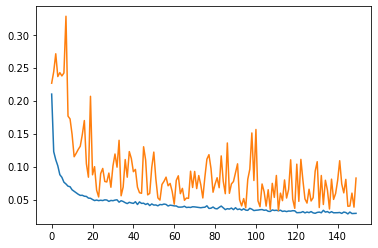

In [ ]:
plt.plot(history_comp.history['loss'])
plt.plot(history_comp.history['val_loss'])

In [ ]:
comp_model = tf.keras.models.load_model('/content/drive/My Drive/Bhargav/Pre-trained/comp_model_4x_1_good.h5')

In [ ]:
 validate_data_comp = comp_model.predict(validation_data_arr)

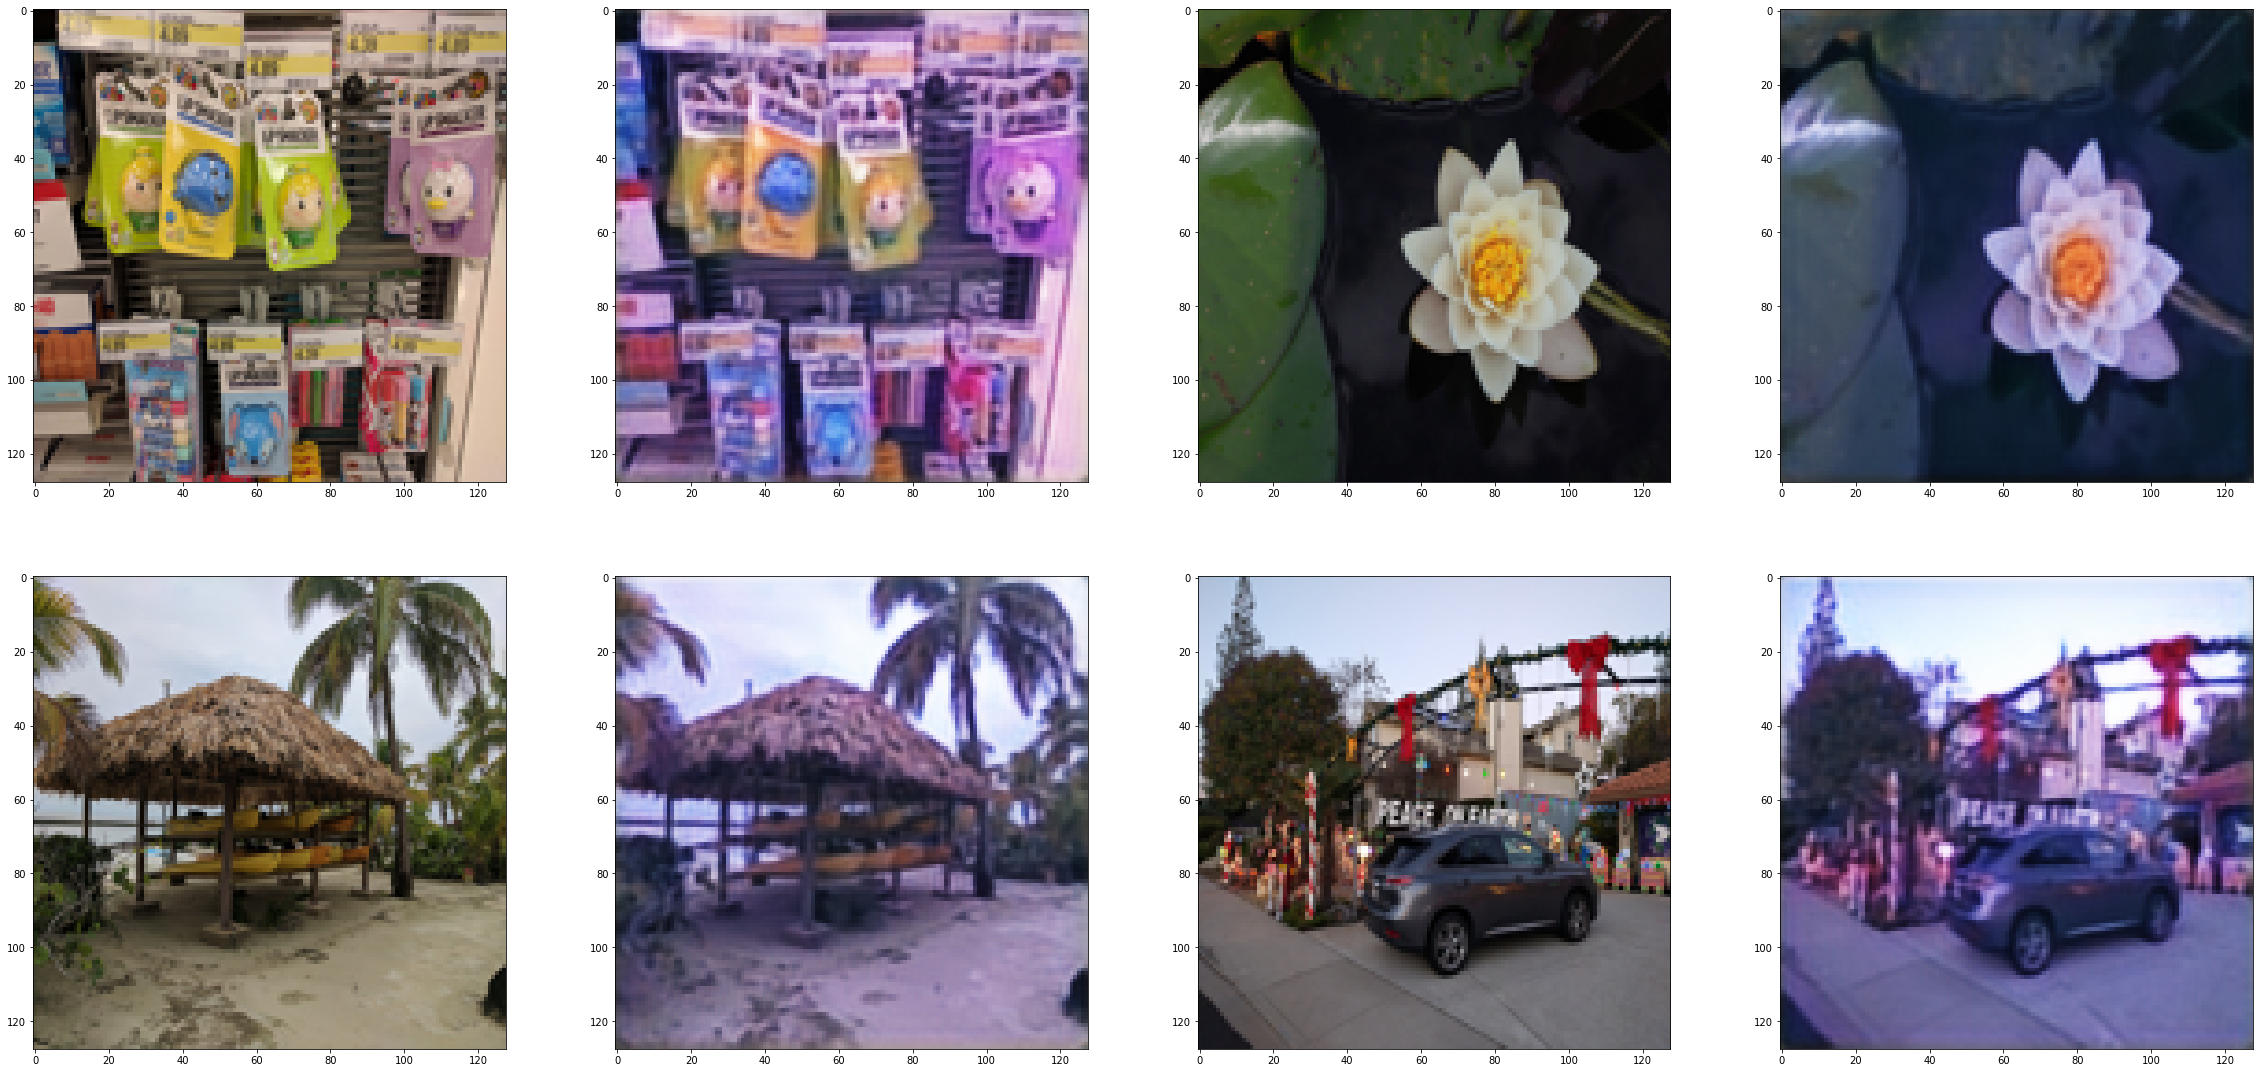

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40,40))
k=10
i=0
for _ in range(4):
  plt.subplot(4,4, i+1)
  plt.imshow(validation_data_arr[k])
  plt.subplot(4,4,i+2)
  plt.imshow(validate_data_comp[k])
  i=i+2
  k=k+1

In [ ]:
model.save('/content/drive/My Drive/Bhargav/Pre-trained/comp_model_4x_1_good.h5')

In [ ]:
validation_data_arr = 0

In [ ]:
#pred_test = comp_model.predict(test_data_arr)

In [ ]:
train_data_comp = comp_model.predict(train_data_arr)

In [ ]:
#train_data_arr = 0

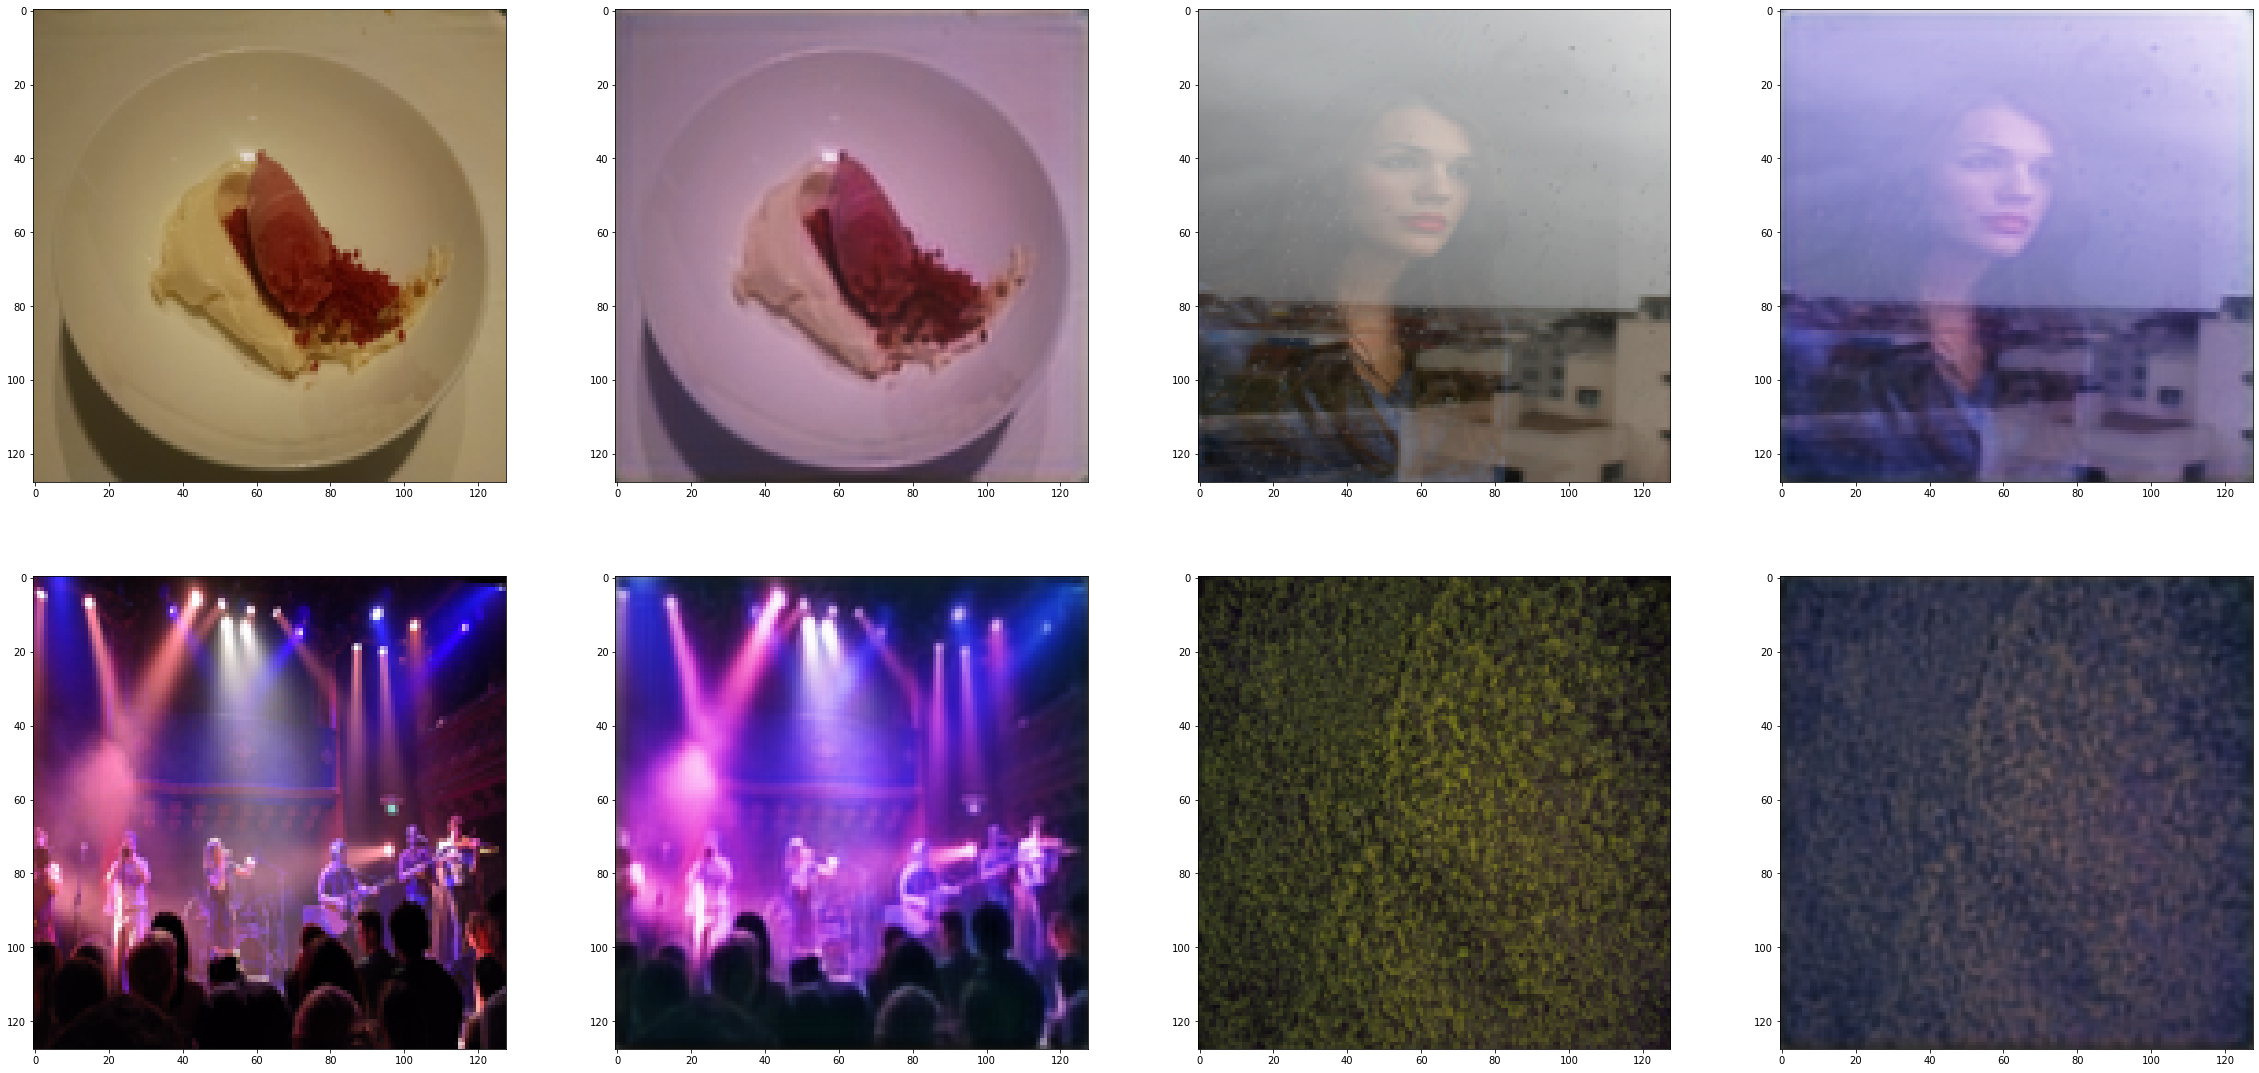

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40,40))
k=10
i=0
for _ in range(4):
  plt.subplot(4,4, i+1)
  plt.imshow(train_data_arr[k])
  plt.subplot(4,4,i+2)
  plt.imshow(train_data_comp[k])
  i=i+2
  k=k+1

# supe-coder model

In [ ]:
def create_SR_model():
    input_img = tf.keras.layers.Input(shape=(128, 128, 3))

    l1 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(input_img)
    l2 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l1)
    l3 = tf.keras.layers.MaxPool2D(padding='same')(l2)

    l4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l3)
    I5 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l4)
    l6 = tf.keras.layers.MaxPool2D(padding='same')(I5)

    l7 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l6)
    e1 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l7)
    #e2 = tf.keras.layers.MaxPool2D(padding='same')(e1)

    e3 = tf.keras.layers.Conv2D(512, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(e1)

    l8 = tf.keras.layers.UpSampling2D()(e3)
    l9 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l8)
    l10 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l9)

    l11 = tf.keras.layers.add([l10, I5])

    l12 = tf.keras.layers.UpSampling2D()(l11)
    l13 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l12)
    l14 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l13)

    l15 = tf.keras.layers.add([l14, l2])
    '''
    e4 = tf.keras.layers.UpSampling2D()(l15)
    l16 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(e4)
    l17 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l16)
    
    e5 = tf.keras.layers.UpSampling2D()(l17)
    l18 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(e5)
    l19 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l18)
    
    l18 = tf.keras.layers.add([l17, l2])
    '''
    decoded_image = tf.keras.layers.Conv2D(3, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l15)

    auto_encoder = tf.keras.models.Model(inputs=(input_img), outputs=decoded_image)

    return auto_encoder

In [ ]:
sr_model = create_SR_model()

In [ ]:
sr_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 128 3584        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 128 147584      conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 128)  0           conv2d_1[0][0]                   
_______________________________________________________________________________________

In [ ]:
#with strategy.scope():
sr_model = create_SR_model()
sr_model.compile(optimizer='adam', loss='mse')
history_sr = sr_model.fit(train_data_comp, train_data_arr, epochs=100, batch_size=64, validation_data=(validate_data_comp, validation_data_arr))

Epoch 1/100
26/26 [==============================] - 30s 1s/step - loss: 5.8407 - val_loss: 0.2476
Epoch 2/100
26/26 [==============================] - 26s 987ms/step - loss: 0.2224 - val_loss: 0.1717
Epoch 3/100
26/26 [==============================] - 25s 979ms/step - loss: 0.1665 - val_loss: 0.1614
Epoch 4/100
26/26 [==============================] - 26s 984ms/step - loss: 0.1606 - val_loss: 0.1603
Epoch 5/100
26/26 [==============================] - 26s 985ms/step - loss: 0.1600 - val_loss: 0.1600
Epoch 6/100
26/26 [==============================] - 26s 982ms/step - loss: 0.1598 - val_loss: 0.1599
Epoch 7/100
26/26 [==============================] - 26s 981ms/step - loss: 0.1597 - val_loss: 0.1594
Epoch 8/100
26/26 [==============================] - 26s 983ms/step - loss: 0.1592 - val_loss: 0.1592
Epoch 9/100
26/26 [==============================] - 25s 980ms/step - loss: 0.1591 - val_loss: 0.1592
Epoch 10/100
26/26 [==============================] - 26s 981ms/step - loss: 0.1591 -

In [ ]:
sr_model.save('/content/drive/My Drive/Bhargav/Pre-trained/SR_model_100_epoch_4x_1_good.h5')

(0.0, 0.3)

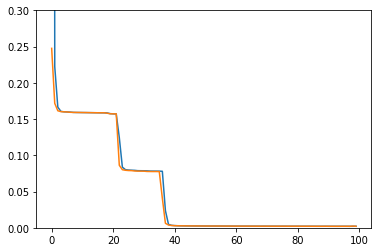

In [ ]:
plt.plot(history_sr.history['loss'])
plt.plot(history_sr.history['val_loss'])
plt.ylim([0, 0.3])

#Pre trained import

In [12]:
comp_model = tf.keras.models.load_model('/content/drive/My Drive/Bhargav/Pre-trained/comp_model_4x_1_good.h5')
sr_model = tf.keras.models.load_model('/content/drive/My Drive/Bhargav/Pre-trained/SR_model_100_epoch_4xcomp_1_good.h5')

In [14]:
test_data_comp = comp_model.predict(test_data_arr)

In [16]:
sr_test_data = sr_model.predict(test_data_comp)

In [ ]:
#sr_pred_train = sr_model.predict(pred_train)

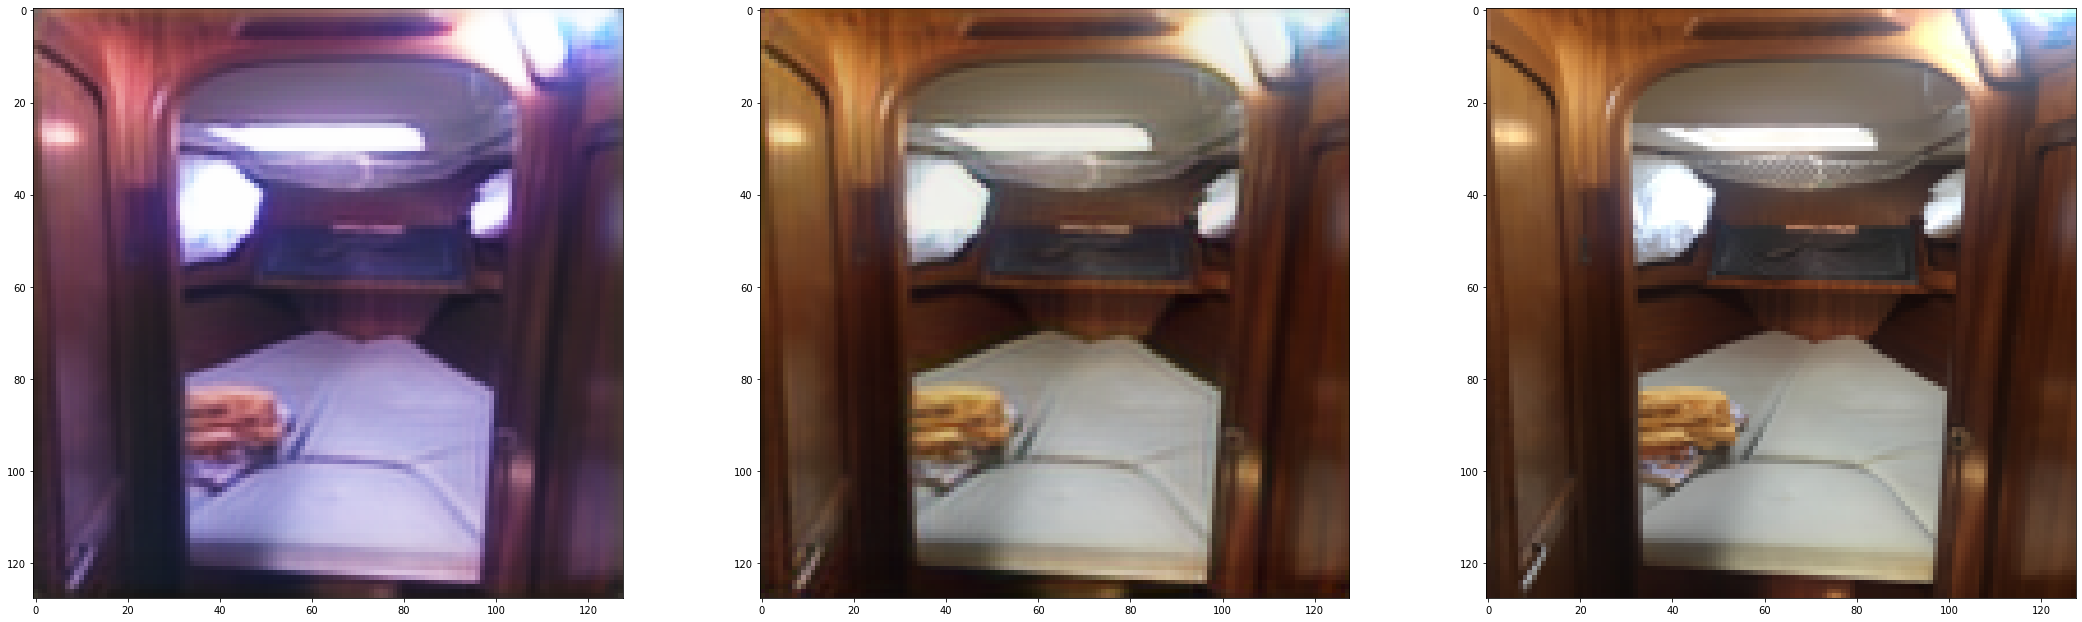

In [17]:
image_index = 5
plt.figure(figsize=(128, 128))
i = 1
ax = plt.subplot(10, 10, i)
plt.imshow(test_data_comp[image_index])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(sr_test_data[image_index])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(test_data_arr[image_index])
plt.show()

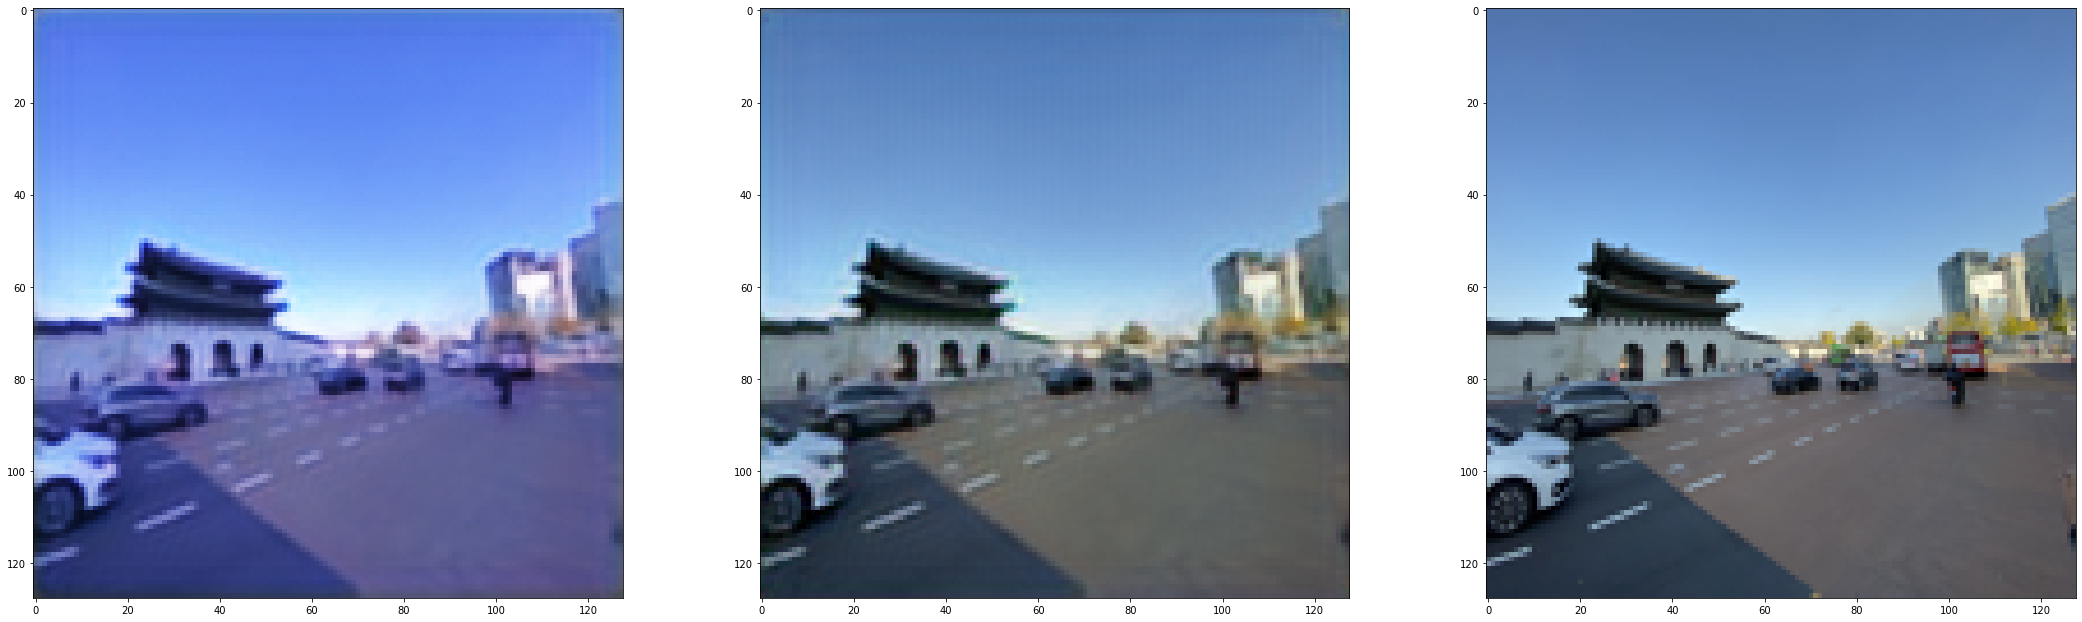

In [19]:
image_index = 9
plt.figure(figsize=(128, 128))
i = 1
ax = plt.subplot(10, 10, i)
plt.imshow(test_data_comp[image_index])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(sr_test_data[image_index])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(test_data_arr[image_index])
plt.show()

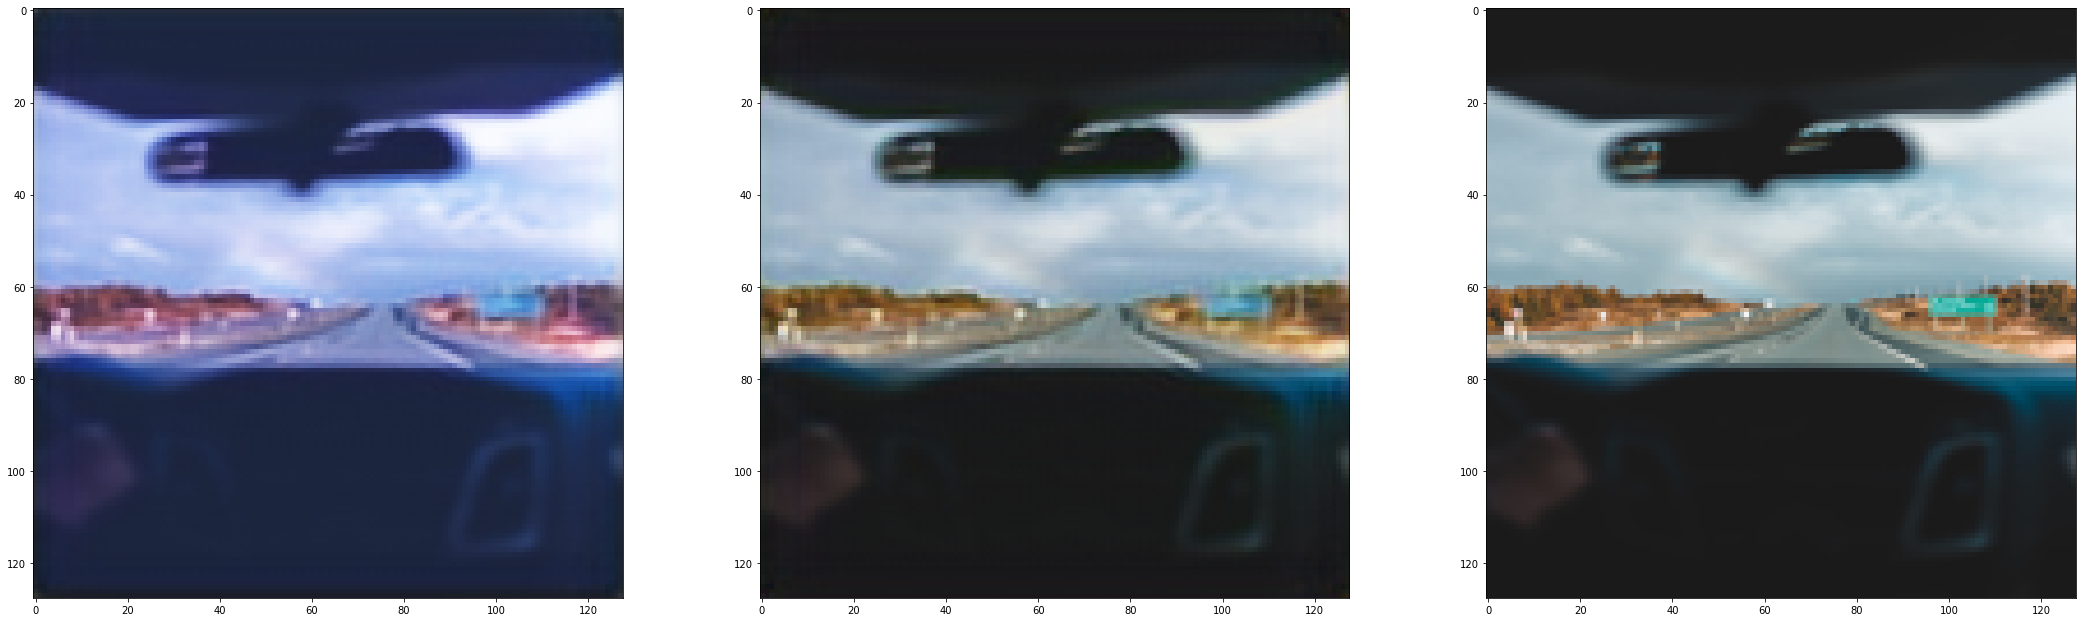

In [20]:
image_index = 16
plt.figure(figsize=(128, 128))
i = 1
ax = plt.subplot(10, 10, i)
plt.imshow(test_data_comp[image_index])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(sr_test_data[image_index])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(test_data_arr[image_index])
plt.show()

In [21]:
orig_image = Image.fromarray(np.uint8(test_data_arr[16]*255)).convert('RGB')
comp_image = Image.fromarray(np.uint8(test_data_comp[16]*255)).convert('RGB')
sr_image = Image.fromarray(np.uint8(sr_test_data[16]*255)).convert('RGB')

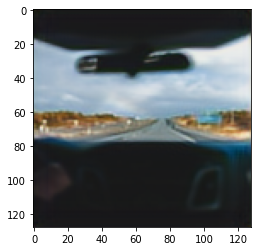

In [24]:
plt.imshow(sr_image)

In [38]:
idx = 5

In [39]:
tf.image.psnr(np.uint8(test_data_arr[idx]*255), np.uint8(test_data_comp[idx]*255), max_val=255)

<tf.Tensor: shape=(), dtype=float32, numpy=19.506285>

In [40]:
tf.image.psnr(np.uint8(test_data_arr[idx]*255), np.uint8(sr_test_data[idx]*255), max_val=255)

<tf.Tensor: shape=(), dtype=float32, numpy=31.547823>

In [32]:
tf.image.ssim(np.uint8(test_data_arr[9]*255), np.uint8(test_data_comp[9]*255), max_val=255)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9315626>

In [33]:
tf.image.ssim(np.uint8(test_data_arr[9]*255), np.uint8(sr_test_data[9]*255), max_val=255)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9632209>

In [ ]:
PIL_image.save('comp_test_3_128.jpg')

In [ ]:
plt.imshow()

In [ ]:
comp_model.evaluate(test_data_arr, test_data_arr)

14/14 [==============================] - 3s 223ms/step - loss: 0.0831


0.08313233405351639

In [ ]:
test_comp = comp_model.predict(test_data_arr)

In [ ]:
sr_model.evaluate(test_comp, test_data_arr)

14/14 [==============================] - 2s 178ms/step - loss: 0.0022


0.0021502673625946045